In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Make plots a little bigger
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True

# Reproducible randomness
np.random.seed(11)

# Number of people in each group
n_per_group = 35

# Group labels and their true means (try changing these means)
groups = ['A','B','C','D']
true_means = [70, 72, 78, 82]   # change to [75,75,75,75] and see what happens!
within_sd  = 8                  # within-group standard deviation

# Build a DataFrame with generated data
data_frames = []
for g, mu in zip(groups, true_means):
    vals = np.random.normal(loc=mu, scale=within_sd, size=n_per_group)
    data_frames.append(pd.DataFrame({'group': g, 'score': vals}))

df = pd.concat(data_frames, ignore_index=True)
df.head()

,group,score
0,A,83.995638
1,A,67.711416
2,A,66.123479
3,A,48.773452
4,A,69.933723


Ho = Are all group means equal?

Ha = Atleast one group mean is different

In [8]:
alpha = 0.05

samples = [df.loc[df.group == g,'score'].values for g in groups]
F, p = stats.f_oneway(*samples) #* argument unpacking proerations

In [10]:
samples

[array([83.99563793, 67.71141603, 66.12347894, 48.77345153, 69.93372297,
        67.44294909, 65.7069651 , 72.52322135, 73.36840573, 61.47517616,
        62.91008264, 66.19413206, 75.51745848, 74.48953741, 59.55561192,
        61.04419791, 75.89469913, 82.59707258, 69.75139929, 64.53242698,
        78.76503759, 67.5233869 , 75.8060178 , 82.39257307, 75.04063858,
        70.5879459 , 75.85817083, 64.85939686, 68.5752546 , 65.40836352,
        68.36499747, 66.1080392 , 68.51379741, 66.95570867, 70.71182108]),
 array([72.50937329, 74.37077686, 83.22216896, 59.62509946, 82.36494868,
        70.10199643, 62.14123035, 70.62064186, 72.734707  , 80.54046766,
        63.50692441, 73.73878566, 72.94255603, 58.52711286, 62.51395788,
        76.80081605, 77.56453804, 80.70168688, 76.27057373, 75.1616961 ,
        72.98294023, 81.67281314, 65.25547119, 70.86485135, 75.0828331 ,
        59.38004553, 82.48754912, 65.65707994, 71.4260047 , 89.25339541,
        65.36450198, 67.76502378, 84.49362955, 63

In [9]:
if p < alpha:
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Reject Ho


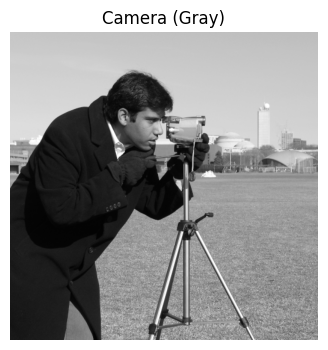

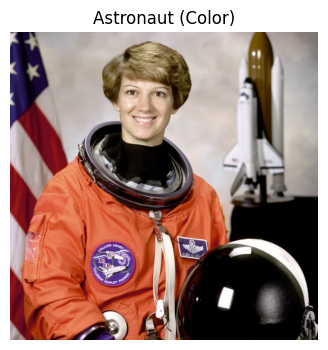

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.grid'] = False

def show(img, title=None, cmap=None):
    plt.figure()
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or 'gray', vmin=0, vmax=1)
    else:
        plt.imshow(np.clip(img,0,1))
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

def to_float01(img):
    img = img.astype(np.float32)
    if img.ndim == 3 and img.shape[2] == 4:
        img = img[:, :, :3]  # drop alpha
    if img.max() > 1.0:
        img = img / 255.0
    return np.clip(img, 0, 1)

def load_samples_or_demo():
    try:
        from skimage import data
        imgs = {
            'camera_gray': to_float01(data.camera()),
            'astronaut':   to_float01(data.astronaut()),
            'coffee':      to_float01(data.coffee()),
        }
        return imgs
    except Exception:
        # build a simple colorful demo
        h, w = 360, 480
        x = np.linspace(0,1,w)
        y = np.linspace(0,1,h)
        X, Y = np.meshgrid(x, y)
        R = X
        G = Y
        B = 0.5 + 0.5*np.sin(6*(X+Y))
        demo = np.stack([R,G,B], axis=2).astype(np.float32)
        return {'camera_gray': (0.299*demo[:,:,0] + 0.587*demo[:,:,1] + 0.114*demo[:,:,2]),
                'astronaut': demo,
                'coffee': demo.copy()}

imgs = load_samples_or_demo()
camera = imgs['camera_gray']  # 2D
astronaut = imgs['astronaut'] # 3D RGB
coffee = imgs['coffee']       # 3D RGB

show(camera, "Camera (Gray)")
show(astronaut, "Astronaut (Color)")

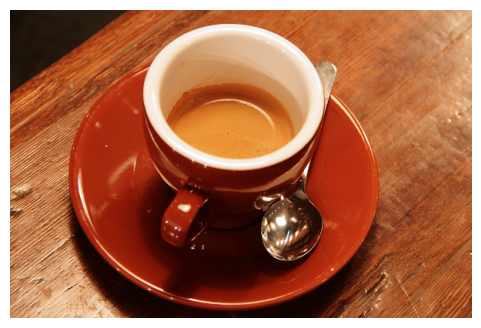

In [46]:
show(coffee)

In [11]:
import numpy as np

np.array(obj, dtype = )

In [12]:
a = np.array([1,2,3])

In [13]:
a.shape

(3,)

In [14]:
a.dtype

dtype('int64')

In [15]:
a

array([1, 2, 3])

In [16]:
a_float = np.array([1,2,3],dtype = np.float32)

In [17]:
a_float

array([1., 2., 3.], dtype=float32)

In [19]:
a_float.shape

(3,)

In [20]:
a = np.array([[1,2,3]])

In [22]:
a.shape

(1, 3)

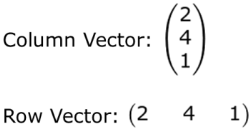

In [24]:
a = np.array([[1,2,3],
             [2,3,5]])

In [25]:
a.shape

(2, 3)

In [27]:
a = np.array([[1,2,3],
             [2,3,5], [2,5,6],[8,6,3]])

In [28]:
a.shape

(4, 3)

In [29]:
a = np.array([[[1,2,3],
             [2,3,5], [2,5,6],[8,6,3]]])
a.shape

(1, 4, 3)

In [43]:
range_np = np.arange(0,10,2) #start, stop, step

In [44]:
range_np

array([0, 2, 4, 6, 8])

In [36]:
range_linspace = np.linspace(0,1,5) #start, stop, Equal spacing step

In [37]:
range_linspace

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [39]:
zeros_23 = np.zeros((2,3))

In [40]:
zeros_23

array([[0., 0., 0.],
       [0., 0., 0.]])

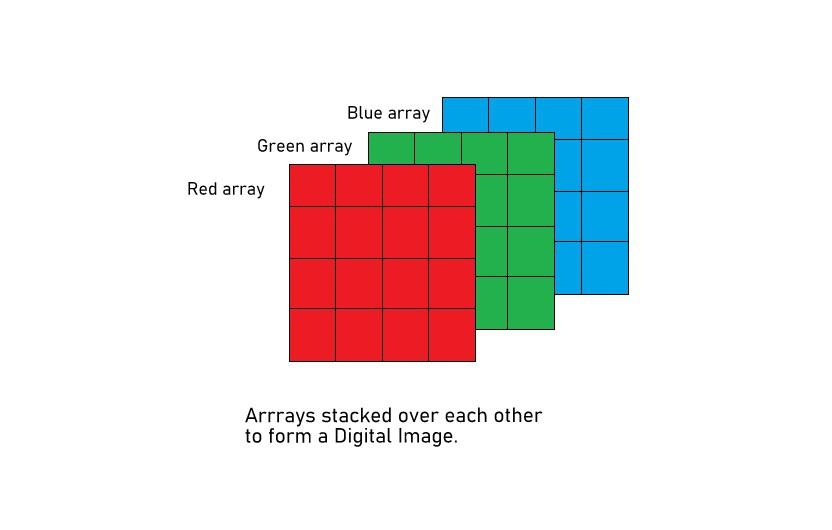

In [47]:
astronaut.shape #[512x512] - 3 matrices as R,G,B

(512, 512, 3)

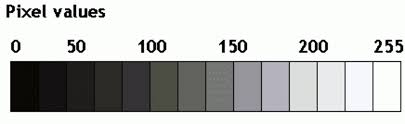

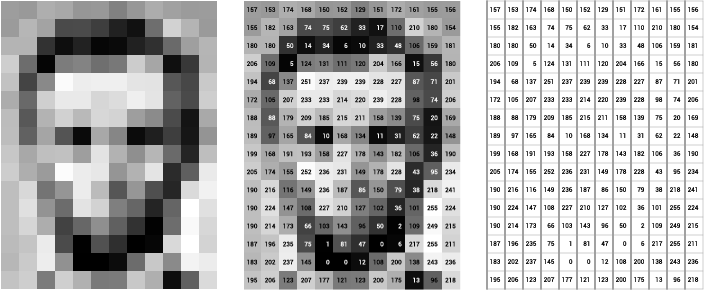

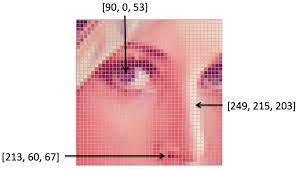

In [56]:
astronaut[:,:,0]

array([[0.6039216 , 0.42745098, 0.24705882, ..., 0.49803922, 0.47058824,
        0.49019608],
       [0.69411767, 0.5647059 , 0.44313726, ..., 0.49803922, 0.4862745 ,
        0.4745098 ],
       [0.7882353 , 0.7137255 , 0.65882355, ..., 0.5019608 , 0.49411765,
        0.4862745 ],
       ...,
       [0.7294118 , 0.7294118 , 0.7176471 , ..., 0.        , 0.        ,
        0.        ],
       [0.7176471 , 0.7137255 , 0.7254902 , ..., 0.        , 0.00392157,
        0.        ],
       [0.72156864, 0.7176471 , 0.7058824 , ..., 0.        , 0.00392157,
        0.        ]], dtype=float32)

In [68]:
astronaut[20:300,20:300,0] = 1.0

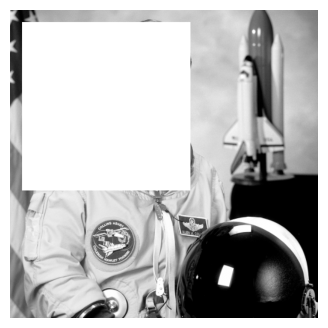

In [69]:
show(astronaut[:,:,0]) #max

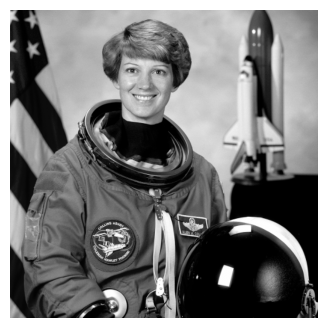

In [70]:
show(astronaut[:,:,1])

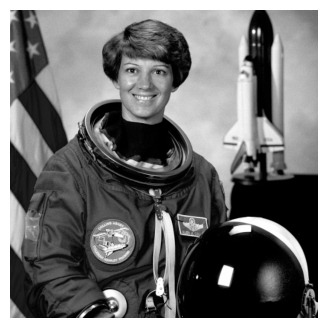

In [71]:
show(astronaut[:,:,2])

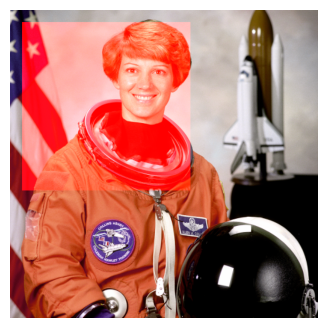

In [72]:
show(astronaut)

In [59]:
a = np.array([[1,12,3,4],
 [23,5,2,3],
 [2,3,4,4]])
a.shape

(3, 4)

In [58]:
camera.shape

(512, 512)

![image.png]()

In [60]:
camera #Pixels

array([[0.78431374, 0.78431374, 0.78431374, ..., 0.7411765 , 0.74509805,
        0.74509805],
       [0.78431374, 0.78039217, 0.78039217, ..., 0.74509805, 0.74509805,
        0.74509805],
       [0.78039217, 0.78039217, 0.78039217, ..., 0.74509805, 0.74509805,
        0.74509805],
       ...,
       [0.09803922, 0.09803922, 0.10588235, ..., 0.54509807, 0.47843137,
        0.5764706 ],
       [0.09803922, 0.09803922, 0.10196079, ..., 0.61960787, 0.5529412 ,
        0.65882355],
       [0.09803922, 0.09803922, 0.10588235, ..., 0.5921569 , 0.59607846,
        0.58431375]], dtype=float32)